In [34]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [35]:
trueNews = pd.read_csv('True.csv')
trueNews.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [36]:
fakeNews = pd.read_csv('Fake.csv')
fakeNews.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [37]:
trueNews['validity'] = 1
fakeNews['validity'] = 0

In [38]:
df = pd.DataFrame()
df = trueNews.append(fakeNews)
df

,title,text,subject,date,validity
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1
...,...,...,...,...,...
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",0
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",0
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",0
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",0


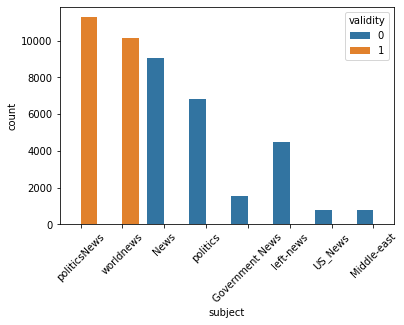

In [39]:
sns.countplot(df['subject'], hue='validity', data=df)
plt.xticks(rotation=45);

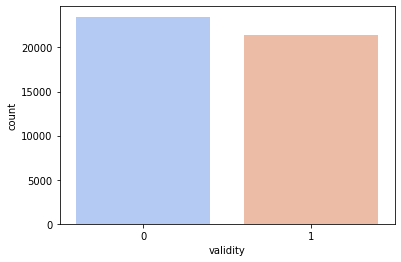

In [40]:
sns.countplot(df['validity'], data=df, palette='coolwarm')

## Cleaning Data

In [41]:
df = df.drop(columns=['subject', 'date'], axis=1)
df.head()

,title,text,validity
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,1


In [42]:
df.isnull().sum()

title       0
text        0
validity    0
dtype: int64

In [43]:
def cleaning(text):
    text = text.lower()
    text = re.sub('[^a-zA-Z]', '', text) #removes all special characters
    token = text.split()
    
    [ps.lemmatize(word) for word in token if not word in stopwords]
    #lemmatize -> bark, barks, barking = bark
    #stop words = a, an, the, is, are...
    
    cleaned_news = ' '.join(news)
    
    return cleaned_news

## Logistic Regression

In [44]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [45]:
x = df['text']
y = df['validity']
vectorizer = CountVectorizer(stop_words='english')
x = vectorizer.fit_transform(x)

In [46]:
#splitting training & test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=1)

#training model
lrmdl = LogisticRegression(max_iter=1000)
lrmdl.fit(x_train, y_train)

/Users/medha/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [47]:
#making predictions on the test set
y_pred = lrmdl.predict(x_test)
accuracy = accuracy_score(y_pred, y_test)
print('Accuracy:', accuracy) #accuracy of of model

Accuracy: 0.9953431868799352


## Random Forest

In [48]:
from sklearn.ensemble import RandomForestClassifier

In [49]:
rfcmdl= RandomForestClassifier(n_estimators=100,criterion='entropy')
rfcmdl.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [50]:
y_pred=rfcmdl.predict(x_test)
accuracy = accuracy_score(y_pred, y_test)
print('Accuracy:', accuracy) #accuracy of of model

Accuracy: 0.9840723493284741


## Support Vector Machines(SVM)

In [51]:
from sklearn.svm import SVC

In [52]:
svmmdl= SVC(kernel='linear', C=1.0, random_state=42)
svmmdl.fit(x_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=42,
    shrinking=True, tol=0.001, verbose=False)

In [53]:
y_pred=svmmdl.predict(x_test)
accuracy = accuracy_score(y_pred, y_test)
print('Accuracy:', accuracy) #accuracy of of model

Accuracy: 0.9950057366538435


## Check Results

In [58]:
def checkValue():
    x = x_train[100]
    
    print('Logistic Regression: ',output(lrmdl.predict(x)))
    print('Random Forest Classifier: ',output(rfcmdl.predict(x)))
    print('Support Vector Machines: ',output(svmmdl.predict(x)))
    
def output(n):
    if n==1:
        return 'True News'
    else:
         return 'Fake News'

In [59]:
checkValue()

Logistic Regression:  True News
Random Forest Classifier:  True News
Support Vector Machines:  True News
